In [4]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import pandas as pd, numpy as np
import matplotlib as mpl
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import confusion_matrix,precision_score,recall_score,roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay
import joblib
from sklearn.inspection import permutation_importance
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.ensemble import BalancedRandomForestClassifier, RUSBoostClassifier
from imblearn.under_sampling import NearMiss
from sklearn.cluster import MiniBatchKMeans
from imblearn.under_sampling import ClusterCentroids
from imblearn.under_sampling import CondensedNearestNeighbour  
from imblearn.under_sampling import EditedNearestNeighbours #把多分类改成二分类了
from imblearn.under_sampling import RepeatedEditedNearestNeighbours#把多分类改成二分类了
from imblearn.under_sampling import AllKNN
from imblearn.combine import SMOTEENN
from sklearn.metrics import matthews_corrcoef
import shap
from sklearn.preprocessing import StandardScaler



In [2]:
# mpl.rcParams['font.sans-serif']=['SimHei']
# mpl.rcParams['axes.unicode_minus']=False
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']


['Individual Innovation ', 'sleep quality', 'Burnouty', 'Work-Family Conflict', 'Life Satisfaction', 'Scientific and technological personnal questionnaire', 'Post', 'Allocation of working time', 'Job satisfaction', 'Income level', 'Life troubles', 'Professional evaluation', 'Occupational Stress', 'Social capital', 'Organizational climate', 'Professional values', 'Current situation and demand of mental health services', 'Mental Health Literacy', 'Perceived Barriers to Seeking Mental Health Services', 'Psychological Capital', 'Administrative intervention', 'Entrepreneurial attitude', 'BackGround']
重采样后的类别分布： Counter({0: 8288, 1: 5068})


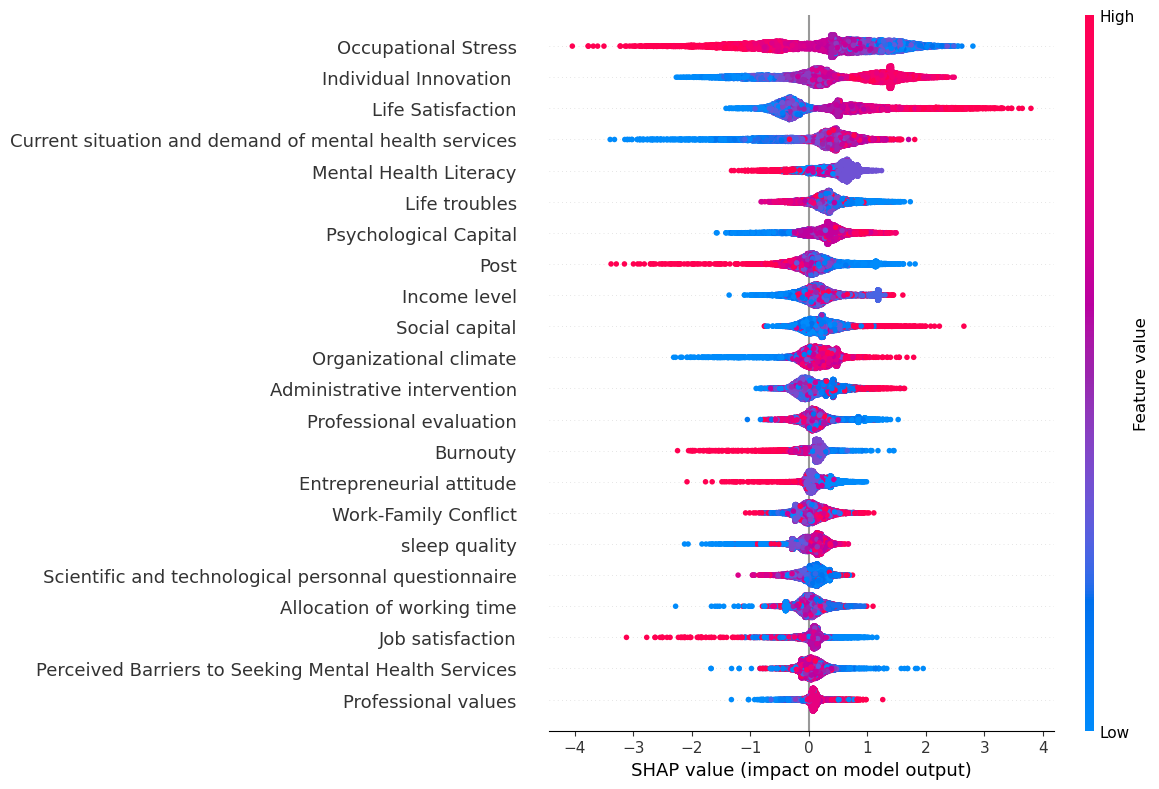

特征重要性：
                                         feature_name   importance
0                              Individual Innovation   2963.673584
12                                Occupational Stress  2963.673584
21                           Entrepreneurial attitude  2963.673584
20                        Administrative intervention  2963.673584
19                              Psychological Capital  2963.673584
18  Perceived Barriers to Seeking Mental Health Se...  2963.673584
17                             Mental Health Literacy  2963.673584
16  Current situation and demand of mental health ...  2963.673584
15                                Professional values  2963.673584
14                             Organizational climate  2963.673584
13                                     Social capital  2963.673584
11                            Professional evaluation  2963.673584
1                                       sleep quality  2963.673584
10                                      Life troubles  

In [14]:
# fpath = r"/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/all/2017科技人员心理健康-按量表分组计算后数据.csv"
fpath = r"/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/all/2017科技人员心理健康-问卷分组计算后数据-shap.csv"


Dataset = pd.read_csv(fpath)
number = 40
y = Dataset['suicide']
x = Dataset.drop(['depression','anxiety','suicide'], axis=1)

feature_names = np.array(x.columns)

names = x.columns
names = list(names)
print(names)
random_state = 42
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=random_state)
x_train = pd.DataFrame(x_train, columns=feature_names)
x_test = pd.DataFrame(x_test, columns=feature_names)

smote = SMOTEENN(random_state=random_state)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)
print("重采样后的类别分布：", Counter(y_train_resampled))

rfc = xgb.XGBClassifier(n_estimators=100,random_state=random_state)

rfc.fit(x_train_resampled, y_train_resampled)
%matplotlib inline

explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(x_train)
class_names = [
     'Suicidal Ideation',
     'No Suicidal Ideation'
]
# 绘制SHAP总结图
shap.summary_plot(shap_values, x_train,max_display=22,plot_size=(12, 8),class_names=class_names)
plt.close()

# 计算特征重要性
feature_importance = np.sum([np.abs(class_shap_values).mean(axis=0) for class_shap_values in shap_values], axis=0)

feature_importance_df = pd.DataFrame(
    {'feature_name': feature_names, 'importance': feature_importance}
)

# 按特征重要性降序排序
sorted_feature_importance_df = feature_importance_df.sort_values(
    by='importance', ascending=False
)
top_features = sorted_feature_importance_df.head(22)

print("特征重要性：")
print(top_features)



原始数据集类别分布： Counter({1: 6749, 0: 6535})
['Sum_IIS', 'Sum_PSQI', 'Sum_MBIGS', 'Sum_WFCS', 'Sum_LSS', 'Sum_STPQ', 'Sum_STPQpost', 'Sum_STPQawt', 'Sum_STPQjs', 'Sum_STPQil', 'Sum_STPQlt', 'Sum_STPQpe', 'Sum_OSI', 'Sum_STPQsc', 'Sum_STPQoc', 'Sum_STPQpv', 'Sum_CSDMHS', 'Sum_MHLQ', 'Sum_PBSMHS', 'Sum_PCQ', 'Sum_STPQai', 'Sum_STPQea']
重采样后的类别分布： Counter({0: 1734, 1: 1611})
[0 1]


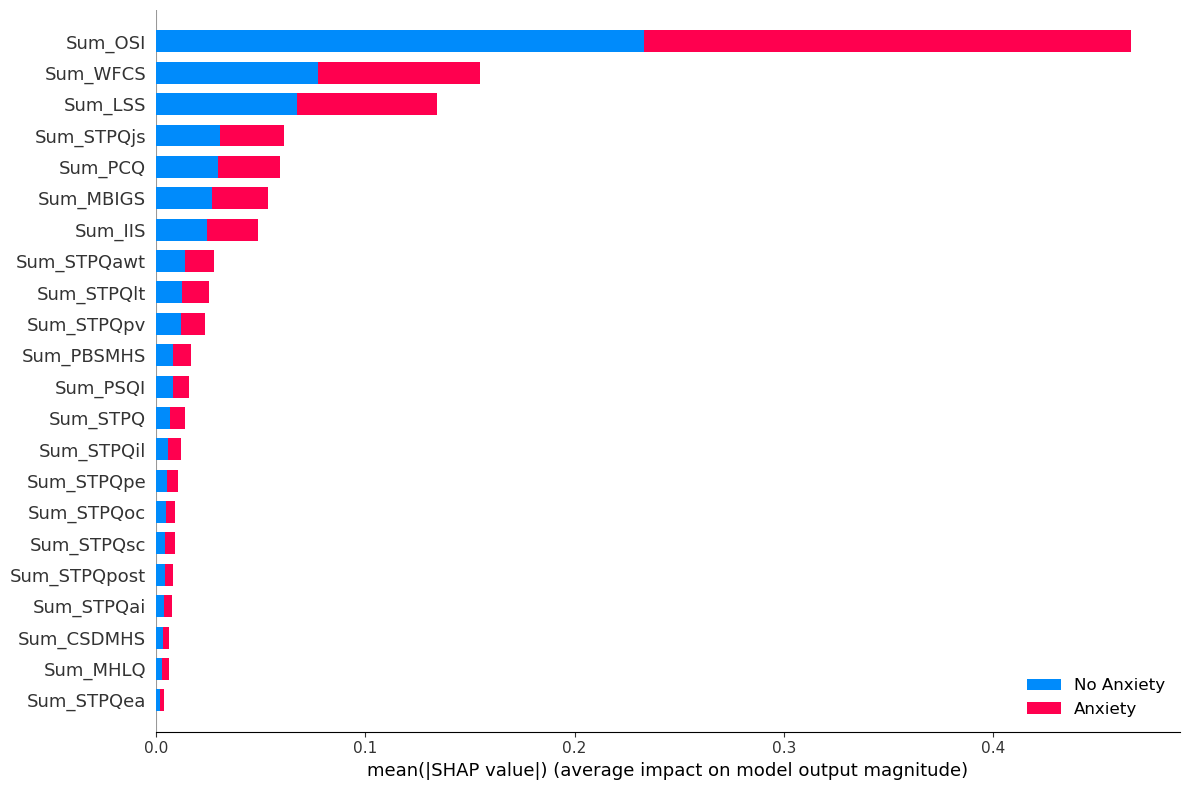

特征重要性：
    feature_name  importance
12       Sum_OSI    0.465858
3       Sum_WFCS    0.154972
4        Sum_LSS    0.134440
8     Sum_STPQjs    0.061060
19       Sum_PCQ    0.059100
2      Sum_MBIGS    0.053697
0        Sum_IIS    0.048553
7    Sum_STPQawt    0.027809
10    Sum_STPQlt    0.025257
15    Sum_STPQpv    0.023573
18    Sum_PBSMHS    0.016720
1       Sum_PSQI    0.015957
5       Sum_STPQ    0.013761
9     Sum_STPQil    0.012032
11    Sum_STPQpe    0.010763
14    Sum_STPQoc    0.009296
13    Sum_STPQsc    0.008954
6   Sum_STPQpost    0.008421
20    Sum_STPQai    0.007560
16    Sum_CSDMHS    0.006453
17      Sum_MHLQ    0.006207
21    Sum_STPQea    0.004052


In [13]:
fpath = r"/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/all/2017科技人员心理健康-问卷分组计算后数据.csv"

Dataset = pd.read_csv(fpath)
number = 23
Dataset = Dataset.drop('depression', axis=1)
Dataset = Dataset.drop('suicide', axis=1)
y = Dataset['anxiety']
x = Dataset.drop('anxiety', axis=1)
print('原始数据集类别分布：', Counter(y))
feature_names = np.array(x.columns)

names = x.columns
names = list(names)
print(names)

random_state = 42
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=random_state)
x_train = pd.DataFrame(x_train, columns=feature_names)
x_test = pd.DataFrame(x_test, columns=feature_names)

smote = SMOTEENN(random_state=random_state)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)
print("重采样后的类别分布：", Counter(y_train_resampled))
rfc = RandomForestClassifier(n_estimators=100,random_state=random_state)

rfc.fit(x_train_resampled, y_train_resampled)
print(rfc.classes_)

%matplotlib inline

explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(x_train)
class_names = [
     'No Anxiety',
     'Anxiety'
]
# 绘制SHAP总结图
shap.summary_plot(shap_values, x_train,max_display=22,plot_size=(12, 8),class_names=class_names)
plt.close()
    

# 计算特征重要性
feature_importance = np.sum([np.abs(class_shap_values).mean(axis=0) for class_shap_values in shap_values], axis=0)

feature_importance_df = pd.DataFrame(
    {'feature_name': feature_names, 'importance': feature_importance}
)

# 按特征重要性降序排序
sorted_feature_importance_df = feature_importance_df.sort_values(
    by='importance', ascending=False
)
top_features = sorted_feature_importance_df.head(22)

print("特征重要性：")
print(top_features)



原始数据集类别分布： Counter({0: 790, 1: 157, 2: 11})
重采样后的类别分布： Counter({2: 550, 1: 523, 0: 268})
[0 1 2]
特征重要性：
                                         feature_name  importance
12                                Occupational Stress    3.239916
0                              Individual Innovation     2.280371
18  Perceived Barriers to Seeking Mental Health Se...    1.353558
7                          Allocation of working time    1.284840
8                                    Job satisfaction    1.209905
20                        Administrative intervention    0.945596
1                                       sleep quality    0.914736
19                              Psychological Capital    0.886444
2                                            Burnouty    0.882781
6                                                Post    0.726088
10                                      Life troubles    0.550575
11                            Professional evaluation    0.526701
14                             Organiz

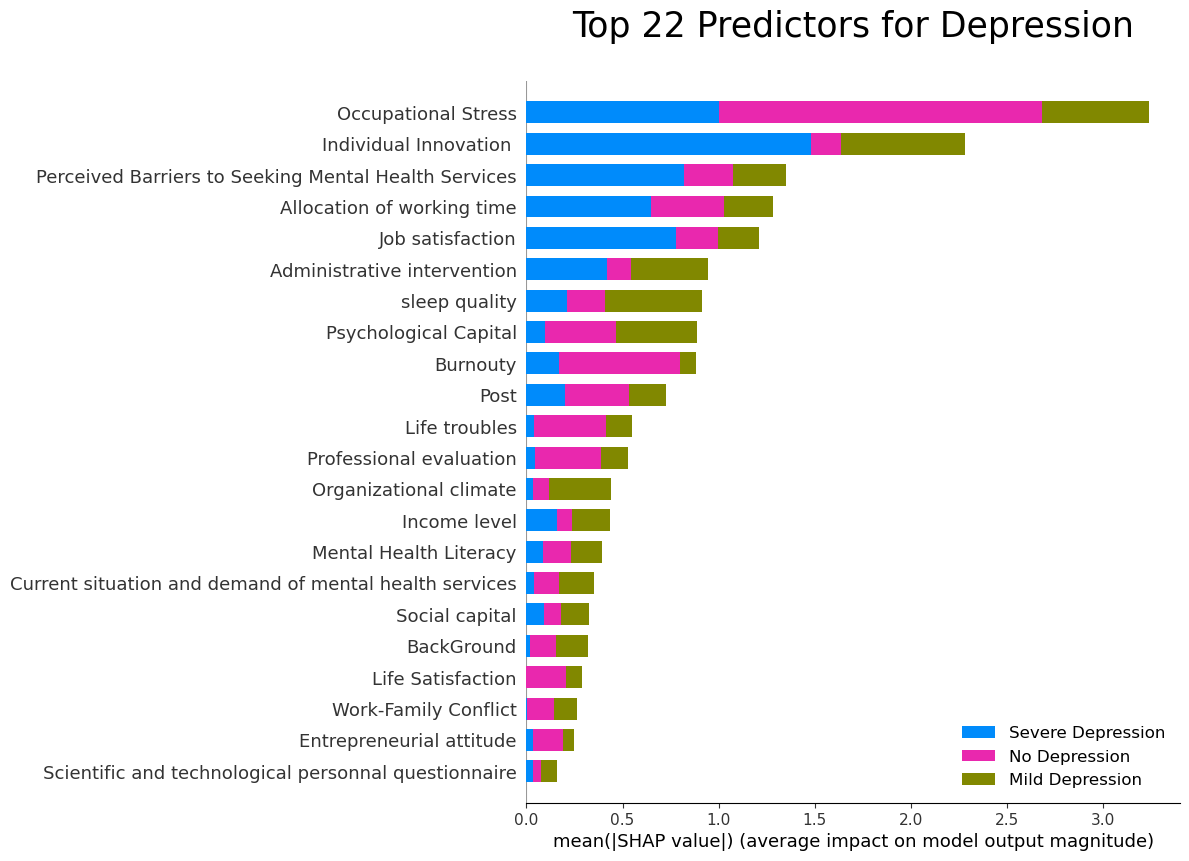

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import shap

fpath = r"/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/all/2017科技人员心理健康-问卷分组计算后数据-shap copy.csv"

Dataset = pd.read_csv(fpath)
number = 30
random_state = 42

Dataset = Dataset.drop('anxiety', axis=1)
Dataset = Dataset.drop('suicide', axis=1)

y = Dataset['depression']
x = Dataset.drop('depression', axis=1)

print('原始数据集类别分布：', Counter(y))

feature_names = np.array(x.columns)
feature_name_mapping = {
    'Sum_IIS': 'Individual Innovation',
    'Sum_PSQI'    :'sleep quality',
    'Sum_MBIGS'   :'Burnouty',
    'Sum_WFCS'    :'Work-Family Conflict',
    'Sum_LSS'     :'Life Satisfaction',
    'Sum_STPQ'    :'Scientific and technological personnal questionnaire',
    'Sum_STPQpost':'Post',
    'Sum_STPQawt' :'Allocation of working time',
    'Sum_STPQjs'  :'Job satisfaction',
    'Sum_STPQil'  :'Income level',
    'Sum_STPQlt'  :'Life troubles',
    'Sum_STPQp'   :'Professional evaluation',
    'Sum_OSI'     :'Occupational Stress',
    'Sum_STPQsc'  :'Social capital',
    'Sum_STPQoc'  :'Organizational climate',
    'Sum_STPQpv'  :'Professional values',
    'Sum_CSDMHS'  :'Current situation and demand of mental health services',
    'Sum_MHLQ'    :'Mental Health Literacy',
    'Sum_PBSMHS'  :'Perceived Barriers to Seeking Mental Health Services',
    'Sum_PCQ'     :'Psychological Capital',
    'Sum_STPQai'  :'Administrative intervention',
    'Sum_STPQea'  :'Entrepreneurial attitude'
}
X_new_names = x.copy()
X_new_names.columns = [feature_name_mapping.get(col, col) for col in x.columns]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
# X_new_names_scaled = scaler.transform(X_new_names)
# x_train_new, x_test_new, _, _ = train_test_split(
#     X_new_names_scaled, y, test_size=0.3, random_state=random_state
# )
# x_train_new = pd.DataFrame(x_train_new, columns=feature_name_mapping.values())


x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=random_state)
x_train = pd.DataFrame(x_train, columns=feature_names)
x_test = pd.DataFrame(x_test, columns=feature_names)
smote = SMOTEENN(random_state=random_state)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)
print("重采样后的类别分布：", Counter(y_train_resampled))

rfc = xgb.XGBClassifier(n_estimators=100,objective='multi:softprob', random_state=random_state)

rfc.fit(x_train_resampled, y_train_resampled)
print(rfc.classes_)

explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(x_test)

# 计算特征重要性
feature_importance = np.sum([np.abs(class_shap_values).mean(axis=0) for class_shap_values in shap_values], axis=0)

feature_importance_df = pd.DataFrame(
    {'feature_name': feature_names, 'importance': feature_importance}
)

# 按特征重要性降序排序
sorted_feature_importance_df = feature_importance_df.sort_values(
    by='importance', ascending=False
)
top_features = sorted_feature_importance_df.head(22)

print("特征重要性：")
print(top_features)

class_names = [
    'No Depression',
    'Mild Depression',
    'Severe Depression'
]
plt.subplots()

# 绘制SHAP总结图
shap.summary_plot(shap_values, x_train, max_display=22, plot_size=(12, 8), class_names=class_names,show=False, plot_type='bar')
plt.title('Top 22 Predictors for Depression', fontsize = 25, y = 1.05)
plt.show()

plt.close()

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.combine import SMOTEENN
import shap

fpath = r"/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/all/2017科技人员心理健康-问卷分组计算后数据-shap copy.csv"

Dataset = pd.read_csv(fpath)
number = 23
Dataset = Dataset.drop('depression', axis=1)
Dataset = Dataset.drop('suicide', axis=1)

y = Dataset['anxiety']
x = Dataset.drop('anxiety', axis=1)

print('原始数据集类别分布：', Counter(y))

feature_names = np.array(x.columns)
random_state = 42

# 创建特征名称映射字典
feature_name_mapping = {
    'Sum_IIS': 'Individual Innovation',
    'Sum_PSQI'    :'sleep quality',
    'Sum_MBIGS'   :'Burnouty',
    'Sum_WFCS'    :'Work-Family Conflict',
    'Sum_LSS'     :'Life Satisfaction',
    'Sum_STPQ'    :'Scientific and technological personnal questionnaire',
    'Sum_STPQpost':'Post',
    'Sum_STPQawt' :'Allocation of working time',
    'Sum_STPQjs'  :'Job satisfaction',
    'Sum_STPQil'  :'Income level',
    'Sum_STPQlt'  :'Life troubles',
    'Sum_STPQp'   :'Professional evaluation',
    'Sum_OSI'     :'Occupational Stress',
    'Sum_STPQsc'  :'Social capital',
    'Sum_STPQoc'  :'Organizational climate',
    'Sum_STPQpv'  :'Professional values',
    'Sum_CSDMHS'  :'Current situation and demand of mental health services',
    'Sum_MHLQ'    :'Mental Health Literacy',
    'Sum_PBSMHS'  :'Perceived Barriers to Seeking Mental Health Services',
    'Sum_PCQ'     :'Psychological Capital',
    'Sum_STPQai'  :'Administrative intervention',
    'Sum_STPQea'  :'Entrepreneurial attitude'
}

# 创建新数据帧并替换特征名称
X_new_names = x.copy()
X_new_names.columns = [feature_name_mapping.get(col, col) for col in x.columns]

# 数据预处理（缩放）
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
X_new_names_scaled = scaler.transform(X_new_names)

# 分割数据集
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=random_state)
x_train_new, x_test_new, _, _ = train_test_split(X_new_names_scaled, y, test_size=0.3, random_state=random_state)

x_train = pd.DataFrame(x_train, columns=feature_names)
x_test = pd.DataFrame(x_test, columns=feature_names)
x_train_new = pd.DataFrame(x_train_new, columns=feature_name_mapping.values())

# 重采样
smote = SMOTEENN(random_state=random_state)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)
x_train_new_resampled, _ = smote.fit_resample(x_train_new, y_train)

print("重采样后的类别分布：", Counter(y_train_resampled))

# 训练随机森林分类器
rfc = RandomForestClassifier(n_estimators=100, random_state=random_state)
rfc.fit(x_train_resampled, y_train_resampled)
print(rfc.classes_)

# SHAP解释器
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(x_train)

class_names = [
    'No Anxiety',
    'Anxiety'
]

# 绘制SHAP总结图
shap.summary_plot(shap_values, x_train_new_resampled, max_display=22, plot_size=(12, 8), class_names=class_names)
plt.close()


原始数据集类别分布： Counter({0: 477, 1: 414, 2: 51, 3: 16})


ValueError: Shape of passed values is (670, 23), indices imply (670, 22)

In [36]:
print("Top 30 predictors for Anxiety")

Top 30 predictors for Anxiety
